##**Introduction**

**Pesticide Use and Crop Yield Trends: Evidence-Based Insights for Sustainable Agriculture**

Agriculture remains a critical pillar of food security and economic stability, particularly in developing and emerging economies. As pressure to increase agricultural productivity grows, pesticide use has become a common intervention to protect crops and enhance yields. However, the long-term implications of pesticide reliance on crop performance, environmental sustainability, and food systems resilience remain a subject of ongoing debate.

This notebook explores the relationship between pesticide usage and crop yields over time using historical agricultural data. Through exploratory data analysis, time-series forecasting, and machine learning techniques, the project seeks to answer three key questions:

How have pesticide usage levels evolved over time?

How have different crop yields responded to these changes?

What do data-driven models suggest about future crop yields up to 2030?



**PESTICIDE USAGE AND CROP YIELD ANALYSIS 1992-2022**

In [1]:
#LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.titleweight'] = 'bold' #bolding the title fonts
plt.rcParams['axes.labelweight'] = 'bold' #bolding the label fonts
plt.rcParams['font.weight'] = 'bold' #bolding the text objets


In [2]:
df=pd.read_excel('/content/Pesticide_use_analysis.xlsx')
df.head()

,YEAR,pesticide usage(kg/ha),pesticide usage(tonne/ha),Wheat yield,Rice yield,Barley yield,Maize yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield
0,1990,0.08,0.00008,1.6551,3.0984,1.8155,1.6591,1.0577,0.6477,0.8473,8.865500
1,1991,0.18,0.00018,1.8484,3.8846,1.8900,1.8321,1.1085,0.5185,0.9572,11.335600
2,1992,0.23,0.00023,1.9359,3.5362,1.9565,1.7271,1.1111,0.5400,1.1216,9.297501
3,1993,0.26,0.00026,1.3795,4.1483,1.9605,1.5549,1.0882,0.6817,0.7454,11.749001
4,1994,0.61,0.00061,2.2164,4.3559,2.4249,2.0400,1.0857,0.6948,0.8640,9.710800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR                       33 non-null     int64  
 1   pesticide usage(kg/ha)     33 non-null     float64
 2   pesticide usage(tonne/ha)  33 non-null     float64
 3   Wheat yield                33 non-null     float64
 4   Rice yield                 33 non-null     float64
 5   Barley yield               33 non-null     float64
 6   Maize yield                33 non-null     float64
 7   Oats yield                 33 non-null     float64
 8   Millet yield               33 non-null     float64
 9   Sorghum yield              33 non-null     float64
 10  Potatoes yield             33 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 3.0 KB


In [4]:
for col in df.columns:
  print(col)

YEAR
pesticide usage(kg/ha)
pesticide usage(tonne/ha)
Wheat yield
Rice yield
Barley yield
Maize yield
Oats yield
Millet yield
Sorghum yield
Potatoes yield


In [5]:
df.describe()

,YEAR,pesticide usage(kg/ha),pesticide usage(tonne/ha),Wheat yield,Rice yield,Barley yield,Maize yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2006.00000,0.494545,0.000495,2.184155,3.909694,2.869079,1.638988,1.036882,0.649406,0.802279,12.220419
std,9.66954,0.219873,0.000220,0.556651,1.036329,0.780990,0.169520,0.068579,0.229242,0.206634,5.049373
min,1990.00000,0.080000,0.000080,1.258100,1.307600,1.596600,1.294300,0.888900,0.270000,0.522100,6.177001
25%,1998.00000,0.330000,0.000330,1.666500,3.461500,2.221100,1.512600,0.990300,0.516400,0.665600,8.865500
50%,2006.00000,0.390000,0.000390,2.106400,3.956600,3.000000,1.659100,1.018800,0.595100,0.755000,9.672901
75%,2014.00000,0.670000,0.000670,2.584500,4.238400,3.378500,1.736600,1.092400,0.694800,0.856900,14.704301
max,2022.00000,0.900000,0.000900,3.199100,6.425500,4.433100,2.040000,1.166700,1.292100,1.434100,22.427902


In [6]:
#confirming the presence of missing values
df.isna().sum()

,0
YEAR,0
pesticide usage(kg/ha),0
pesticide usage(tonne/ha),0
Wheat yield,0
Rice yield,0
Barley yield,0
Maize yield,0
Oats yield,0
Millet yield,0
Sorghum yield,0


**Lack of missing values and columns implies that the data is clean and can proceed to the exploratory data analysis the way it is**

##**EXPLORATORY DATA ANALYSIS**

###**How has pesticide usage Changed across the years**

In [7]:
pesticide_use_trend=df.groupby('YEAR')['pesticide usage(tonne/ha)'].mean().reset_index()
pesticide_use_trend.head()

,YEAR,pesticide usage(tonne/ha)
0,1990,0.00008
1,1991,0.00018
2,1992,0.00023
3,1993,0.00026
4,1994,0.00061


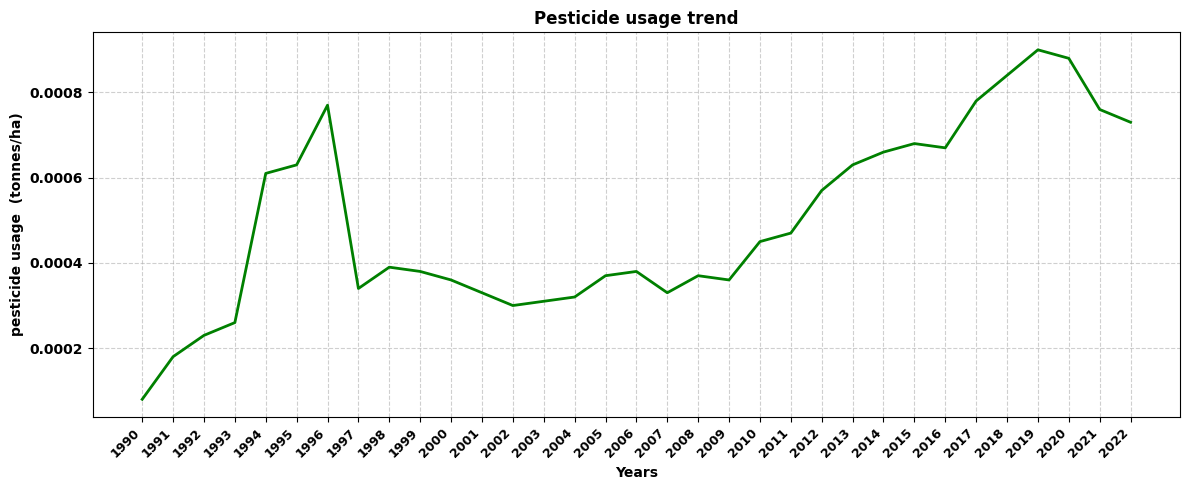

In [8]:
plt.figure(figsize=(12,5))
sns.lineplot(data=pesticide_use_trend, x='YEAR', y='pesticide usage(tonne/ha)',markers='o',color='green', linewidth=2)
plt.title('Pesticide usage trend')
plt.xlabel('Years')
plt.ylabel('pesticide usage  (tonnes/ha)')

#all years pesticide use trend
all_years=pesticide_use_trend['YEAR'].unique()

plt.xticks(ticks=all_years, labels=all_years,rotation=45, ha='right', fontsize=9)
plt.grid(True, linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

###**How has crop yield Change across the years**

In [9]:
df.columns

Index(['YEAR', 'pesticide usage(kg/ha)', 'pesticide usage(tonne/ha)',
       'Wheat yield', 'Rice yield', 'Barley yield', 'Maize yield',
       'Oats yield', 'Millet yield', 'Sorghum yield', 'Potatoes yield'],
      dtype='object')

###**1. WHEAT YIELD**

In [10]:
wheat_yield=df.groupby('YEAR')['Wheat yield'].mean().reset_index()
wheat_yield.head()

,YEAR,Wheat yield
0,1990,1.6551
1,1991,1.8484
2,1992,1.9359
3,1993,1.3795
4,1994,2.2164


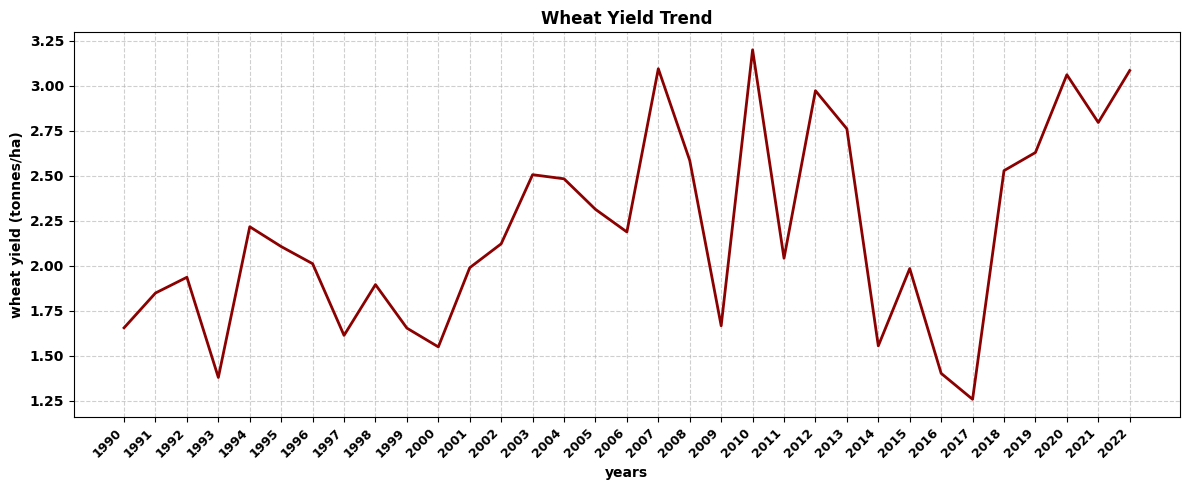

In [11]:
plt.figure(figsize=(12,5))
sns.lineplot(data=wheat_yield, x='YEAR',y='Wheat yield', markers='o', color='darkred', linewidth=2)
plt.title('Wheat Yield Trend')
plt.xlabel('years')
plt.ylabel('wheat yield (tonnes/ha)')

all_wheat=wheat_yield['YEAR'].unique()
plt.xticks(ticks=all_wheat,labels=all_wheat, rotation=45, ha='right', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



###**wheat yield in comparison with average pesticide usage**

In [12]:
#calculating the mean trend for both of the variables
pesticide_use_trend = df.groupby('YEAR')['pesticide usage(tonne/ha)'].mean().reset_index()
wheat_yield_trend = df.groupby('YEAR')['Wheat yield'].mean().reset_index()
#merging the two data frames on YEAR column
combined_wheat=pesticide_use_trend.merge(wheat_yield_trend,on='YEAR',how='inner')
combined_wheat.head()

,YEAR,pesticide usage(tonne/ha),Wheat yield
0,1990,0.00008,1.6551
1,1991,0.00018,1.8484
2,1992,0.00023,1.9359
3,1993,0.00026,1.3795
4,1994,0.00061,2.2164


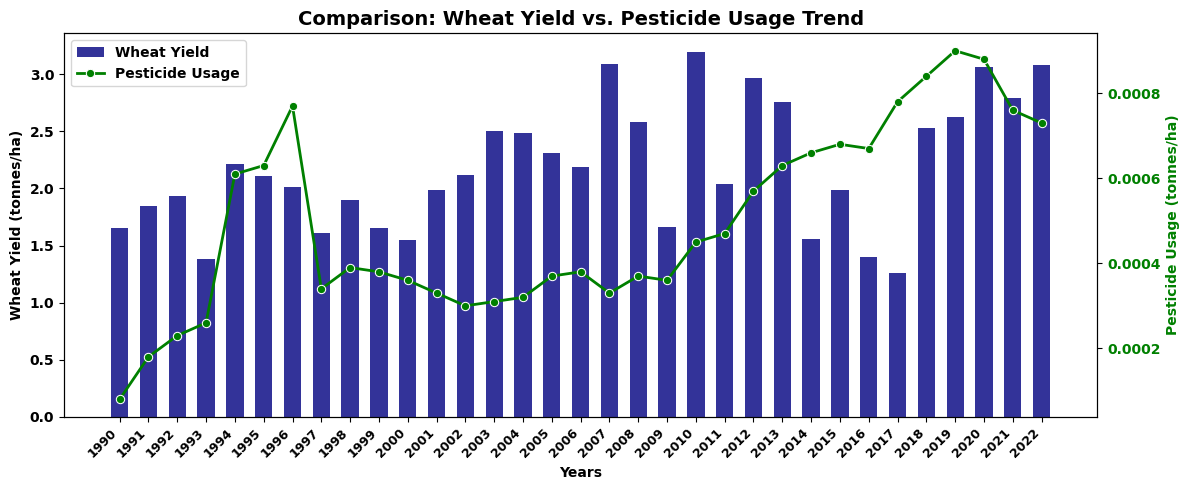

In [13]:
pesticide_use_trend = df.groupby('YEAR')['pesticide usage(tonne/ha)'].mean().reset_index()
wheat_yield = df.groupby('YEAR')['Wheat yield'].mean().reset_index()

combined_wheat = pesticide_use_trend.merge(wheat_yield, on='YEAR', how='inner')

fig, ax1 = plt.subplots(figsize=(12, 5))

# Primary axis - Bar plot for wheat Yield with palette
ax1.set_xlabel('Years', fontweight='bold')
ax1.set_ylabel('Wheat Yield (tonnes/ha)', fontweight='bold')

# Creating a palette with as many colors as years
#palette = sns.color_palette("viridis", n_colors=len(combined_wheat))

bars = ax1.bar(combined_wheat['YEAR'], combined_wheat['Wheat yield'],
               color='navy', alpha=0.8, label='Wheat Yield', width=0.6)
ax1.tick_params(axis='y')
ax1.grid(False)

# Secondary axis - Line plot for Pesticide Usage
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel('Pesticide Usage (tonnes/ha)', color=color2, fontweight='bold')
line = sns.lineplot(data=combined_wheat, x='YEAR', y='pesticide usage(tonne/ha)',
                    marker='o', ax=ax2, color=color2, label='Pesticide Usage', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)

plt.title('Comparison: Wheat Yield vs. Pesticide Usage Trend', fontweight='bold', fontsize=14)

# Set x-axis ticks
all_years = combined_wheat['YEAR'].unique()
ax1.set_xticks(all_years,)
ax1.set_xticklabels(all_years, rotation=45, ha='right', fontsize=9, fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

###**2. RICE YIELD TREND**

In [14]:
rice_yield=df.groupby('YEAR')['Rice yield'].mean().reset_index()
rice_yield.head()

,YEAR,Rice yield
0,1990,3.0984
1,1991,3.8846
2,1992,3.5362
3,1993,4.1483
4,1994,4.3559


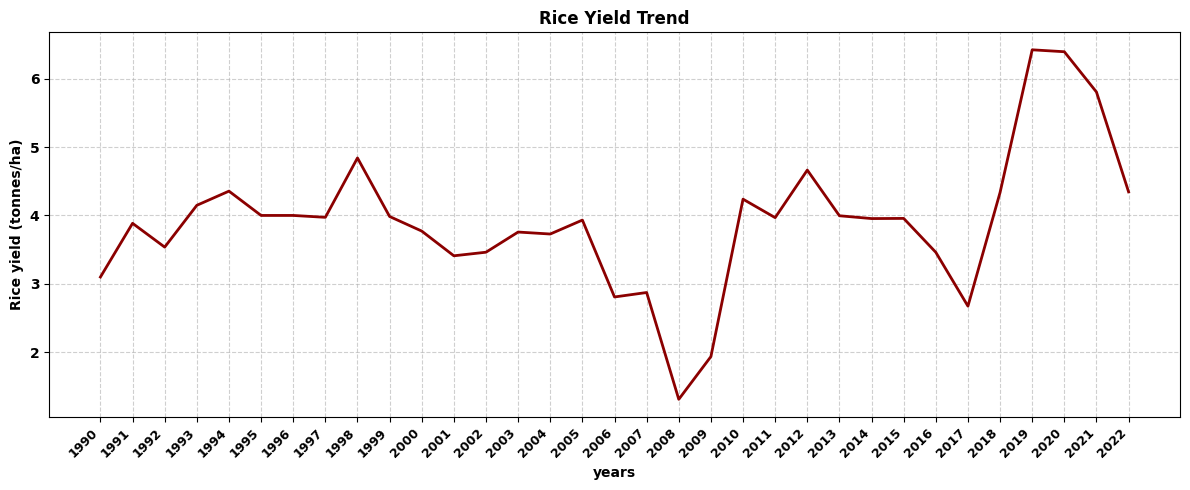

In [15]:
plt.figure(figsize=(12,5))
sns.lineplot(data=rice_yield, x='YEAR',y='Rice yield', markers='o', color='darkred', linewidth=2)
plt.title('Rice Yield Trend')
plt.xlabel('years')
plt.ylabel('Rice yield (tonnes/ha)')

all_rice=rice_yield['YEAR'].unique()
plt.xticks(ticks=all_rice,labels=all_rice, rotation=45, ha='right', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



**RICE YIELD IN COMPARISON WITH AVERAGE PESTICIDE USAGE**

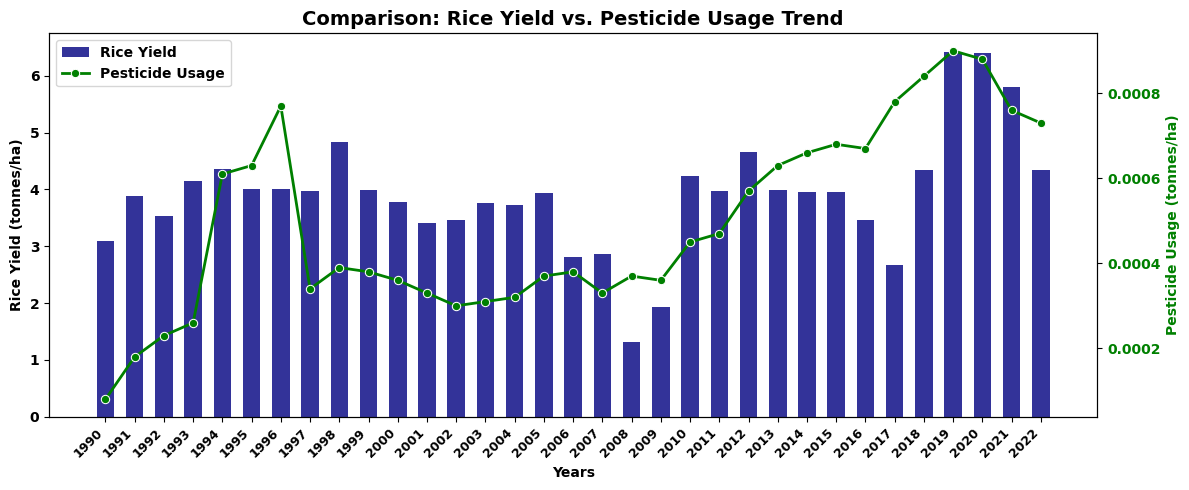

In [16]:
pesticide_use_trend = df.groupby('YEAR')['pesticide usage(tonne/ha)'].mean().reset_index()
rice_yield = df.groupby('YEAR')['Rice yield'].mean().reset_index()

combined_rice = pesticide_use_trend.merge(rice_yield, on='YEAR', how='inner')

fig, ax1 = plt.subplots(figsize=(12, 5))

# Primary axis - Bar plot for Rice Yield with palette
ax1.set_xlabel('Years', fontweight='bold')
ax1.set_ylabel('Rice Yield (tonnes/ha)', fontweight='bold')

# Creating a palette with as many colors as years
#palette = sns.color_palette("viridis", n_colors=len(combined_wheat))

bars = ax1.bar(combined_rice['YEAR'], combined_rice['Rice yield'],
               color='navy', alpha=0.8, label='Rice Yield', width=0.6)
ax1.tick_params(axis='y')
ax1.grid(False)

# Secondary axis - Line plot for Pesticide Usage
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel('Pesticide Usage (tonnes/ha)', color=color2, fontweight='bold')
line = sns.lineplot(data=combined_rice, x='YEAR', y='pesticide usage(tonne/ha)',
                    marker='o', ax=ax2, color=color2, label='Pesticide Usage', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)

plt.title('Comparison: Rice Yield vs. Pesticide Usage Trend', fontweight='bold', fontsize=14)

# Set x-axis ticks
all_years = combined_rice['YEAR'].unique()
ax1.set_xticks(all_years,)
ax1.set_xticklabels(all_years, rotation=45, ha='right', fontsize=9, fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

###**3. BARLEY YIELD TREND**

In [17]:
barley_yield=df.groupby('YEAR')['Barley yield'].mean().reset_index()
barley_yield.head()

,YEAR,Barley yield
0,1990,1.8155
1,1991,1.8900
2,1992,1.9565
3,1993,1.9605
4,1994,2.4249


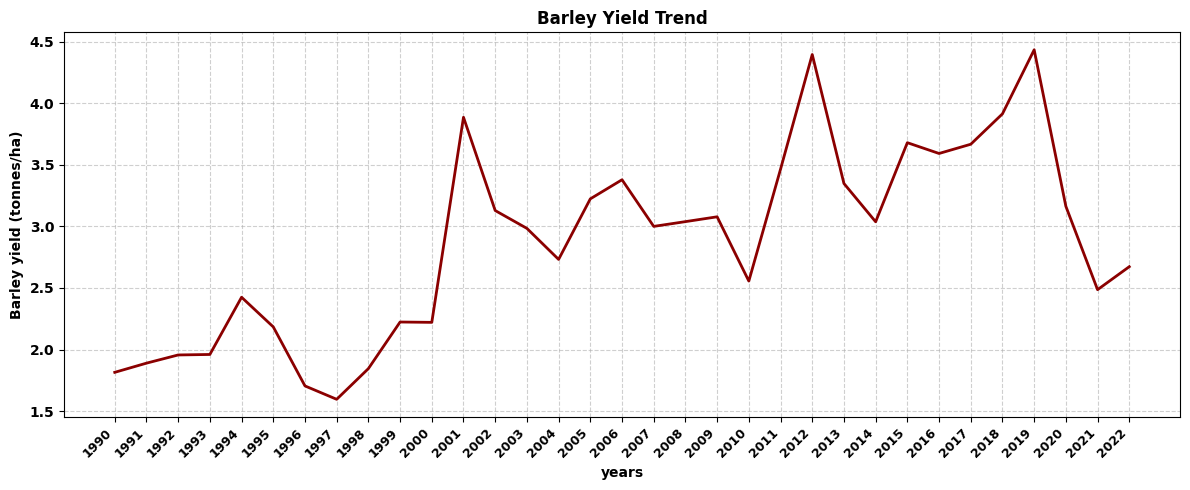

In [18]:
plt.figure(figsize=(12,5))
sns.lineplot(data=barley_yield, x='YEAR', y='Barley yield', color='darkred', markers='o', linewidth=2)
plt.title('Barley Yield Trend')
plt.xlabel('years')
plt.ylabel('Barley yield (tonnes/ha)')

all_barley=barley_yield['YEAR'].unique()
plt.xticks(ticks=all_barley,labels=all_barley, rotation=45, ha='right', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**BARLEY YIELD IN COMPARISON WITH AVERAGE PESTICIDE USAGE**

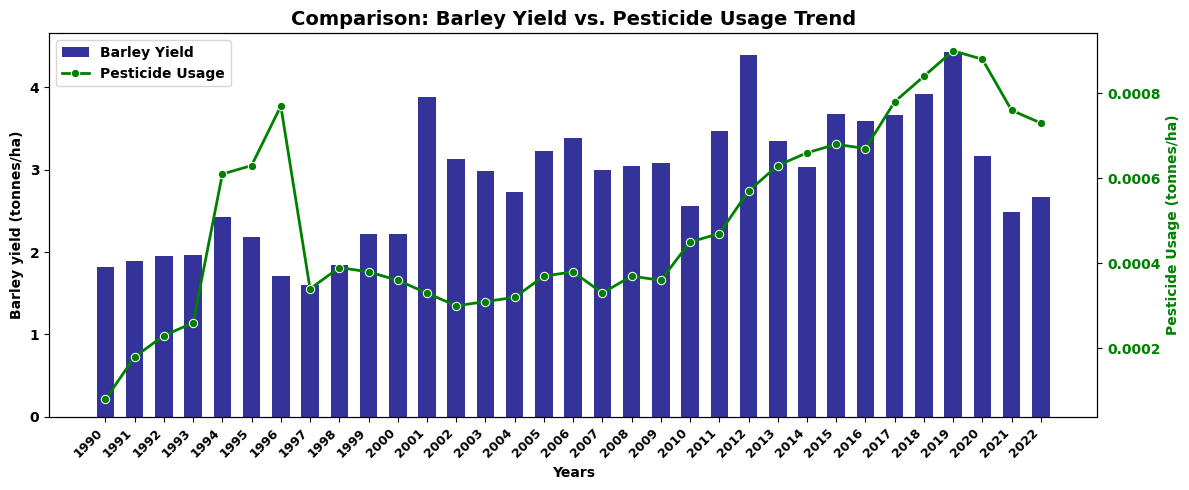

In [19]:
combined_barley=barley_yield.merge(pesticide_use_trend, on='YEAR', how='inner')
combined_barley.head()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Primary axis - Bar plot for Barley Yield with palette
ax1.set_xlabel('Years', fontweight='bold')
ax1.set_ylabel('Barley yield (tonnes/ha)', fontweight='bold')

# Creating a palette with as many colors as years
#palette = sns.color_palette("viridis", n_colors=len(combined_wheat))

bars = ax1.bar(combined_barley['YEAR'], combined_barley['Barley yield'], color='navy', alpha=0.8, label='Barley Yield', width=0.6)
ax1.tick_params(axis='y')
ax1.grid(False)

# Secondary axis - Line plot for Pesticide Usage
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel('Pesticide Usage (tonnes/ha)', color=color2, fontweight='bold')
line = sns.lineplot(data=combined_rice, x='YEAR', y='pesticide usage(tonne/ha)',
                    marker='o', ax=ax2, color=color2, label='Pesticide Usage', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)

plt.title('Comparison: Barley Yield vs. Pesticide Usage Trend', fontweight='bold', fontsize=14)

# Set x-axis ticks
all_years = combined_barley['YEAR'].unique()
ax1.set_xticks(all_years,)
ax1.set_xticklabels(all_years, rotation=45, ha='right', fontsize=9, fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()


###**4. MAIZE YIELD TREND**

In [20]:
maize_yield=df.groupby('YEAR')['Maize yield'].mean().reset_index()
maize_yield.head()

,YEAR,Maize yield
0,1990,1.6591
1,1991,1.8321
2,1992,1.7271
3,1993,1.5549
4,1994,2.0400


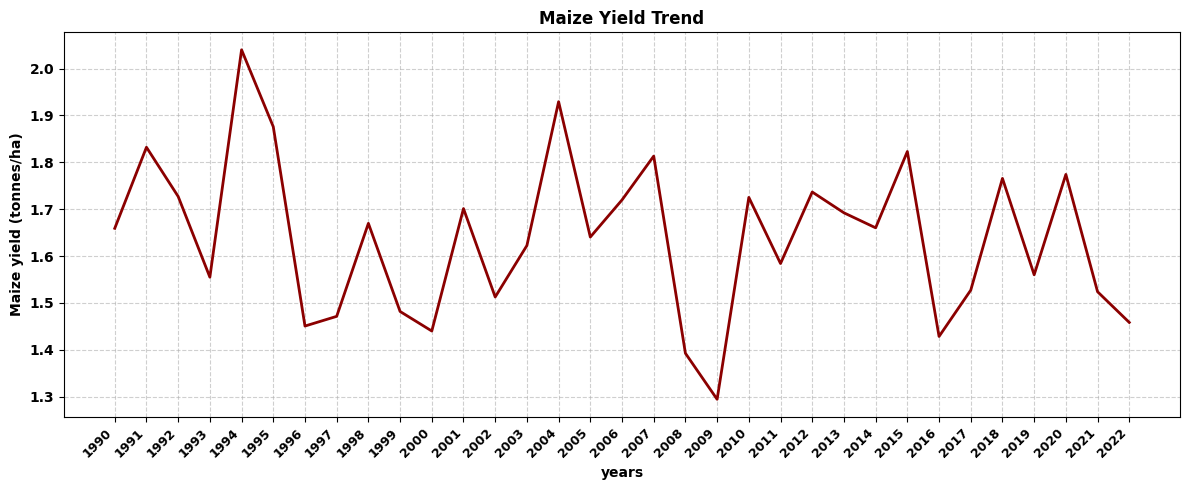

In [21]:
plt.figure(figsize=(12,5))
sns.lineplot(data=maize_yield, x='YEAR',y='Maize yield', color='darkred', markers='o', linewidth=2)
plt. title('Maize Yield Trend')
plt.xlabel('years')
plt.ylabel('Maize yield (tonnes/ha)')

all_maize=maize_yield['YEAR'].unique()
plt.xticks(ticks=all_maize,labels=all_maize, rotation=45, ha='right', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**MAIZE YIELD IN COMPARISON WITH AVERAGE PESTICIDE USAGE**

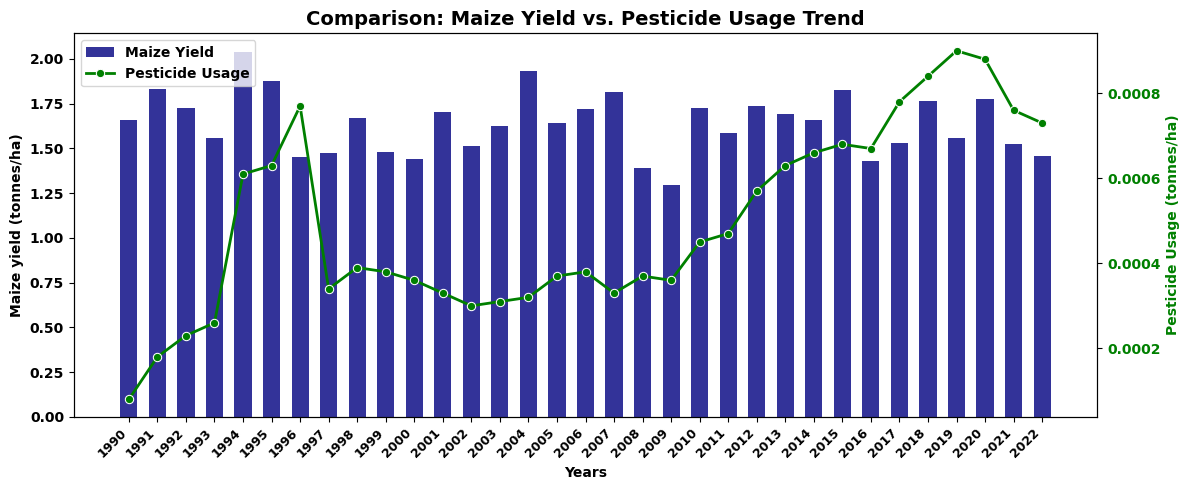

In [22]:
combined_maize=maize_yield.merge(pesticide_use_trend, on='YEAR', how='inner')
combined_maize.head()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Primary axis - Bar plot for Barley Yield with palette
ax1.set_xlabel('Years', fontweight='bold')
ax1.set_ylabel('Maize yield (tonnes/ha)', fontweight='bold')

# Creating a palette with as many colors as years
#palette = sns.color_palette("viridis", n_colors=len(combined_wheat))

bars = ax1.bar(combined_maize['YEAR'], combined_maize['Maize yield'], color='navy', alpha=0.8, label='Maize Yield', width=0.6)
ax1.tick_params(axis='y')
ax1.grid(False)

# Secondary axis - Line plot for Pesticide Usage
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel('Pesticide Usage (tonnes/ha)', color=color2, fontweight='bold')
line = sns.lineplot(data=combined_maize, x='YEAR', y='pesticide usage(tonne/ha)',
                    marker='o', ax=ax2, color=color2, label='Pesticide Usage', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)

plt.title('Comparison: Maize Yield vs. Pesticide Usage Trend', fontweight='bold', fontsize=14)

# Set x-axis ticks
all_years = combined_maize['YEAR'].unique()
ax1.set_xticks(all_years,)
ax1.set_xticklabels(all_years, rotation=45, ha='right', fontsize=9, fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()


###**5. MILLET YIELD TREND**

In [23]:
millet_yield=df.groupby('YEAR')['Millet yield'].mean(). reset_index()
millet_yield.head()

,YEAR,Millet yield
0,1990,0.6477
1,1991,0.5185
2,1992,0.5400
3,1993,0.6817
4,1994,0.6948


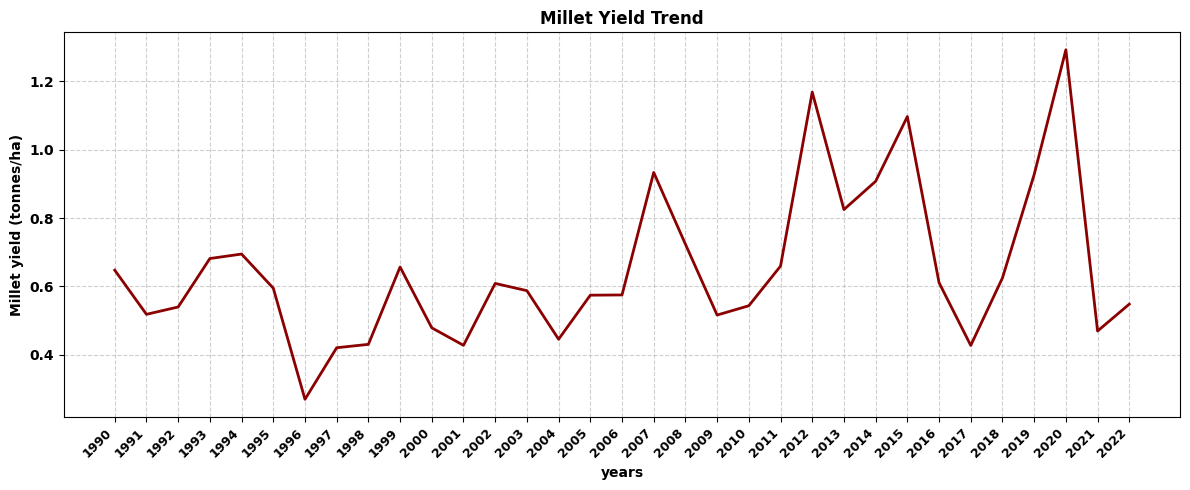

In [24]:
plt.figure(figsize=(12,5))
sns.lineplot(data=millet_yield,x='YEAR',y='Millet yield', color='darkred', linewidth=2)

plt.title('Millet Yield Trend')
plt.xlabel('years')
plt.ylabel('Millet yield (tonnes/ha)')

all_millet=millet_yield['YEAR'].unique()
plt.xticks(ticks=all_millet,labels=all_millet, rotation=45, ha='right', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**MILLET YIELD IN COMPARISON WITH AVERAGE PESTICIDE USAGE**

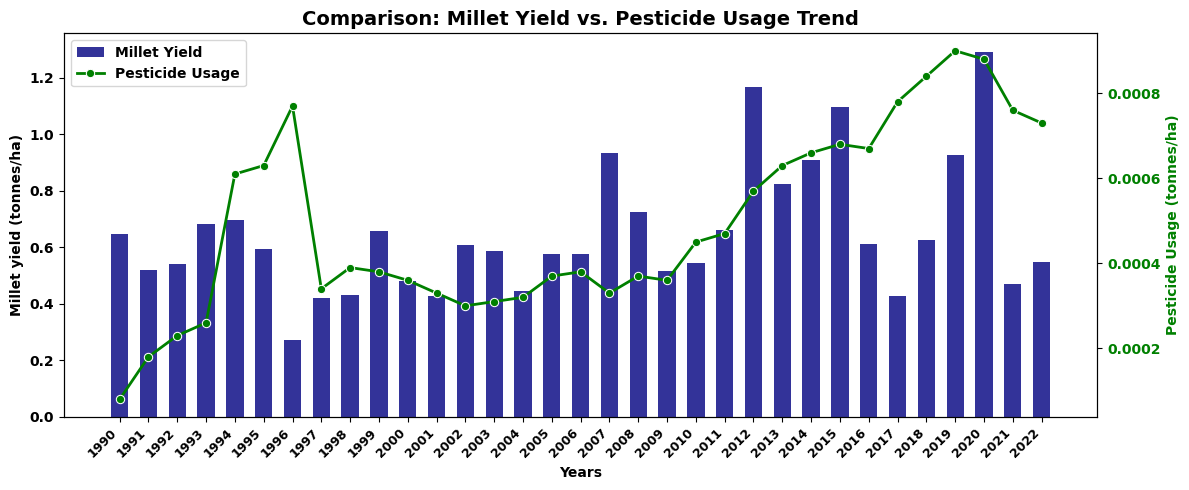

In [25]:
combined_millet=millet_yield.merge(pesticide_use_trend, on='YEAR', how='inner')
combined_millet.head()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Primary axis - Bar plot for Barley Yield with palette
ax1.set_xlabel('Years', fontweight='bold')
ax1.set_ylabel('Millet yield (tonnes/ha)', fontweight='bold')

# Creating a palette with as many colors as years
#palette = sns.color_palette("viridis", n_colors=len(combined_wheat))

bars = ax1.bar(combined_millet['YEAR'], combined_millet['Millet yield'], color='navy', alpha=0.8, label='Millet Yield', width=0.6)
ax1.tick_params(axis='y')
ax1.grid(False)

# Secondary axis - Line plot for Pesticide Usage
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel('Pesticide Usage (tonnes/ha)', color=color2, fontweight='bold')
line = sns.lineplot(data=combined_maize, x='YEAR', y='pesticide usage(tonne/ha)',
                    marker='o', ax=ax2, color=color2, label='Pesticide Usage', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)

plt.title('Comparison: Millet Yield vs. Pesticide Usage Trend', fontweight='bold', fontsize=14)

# Set x-axis ticks
all_years = combined_millet['YEAR'].unique()
ax1.set_xticks(all_years,)
ax1.set_xticklabels(all_years, rotation=45, ha='right', fontsize=9, fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

###**6. SORGHUM YIELD TREND**

In [26]:

sorghum_yield=df.groupby('YEAR')['Sorghum yield'].mean().reset_index()
sorghum_yield.head()


,YEAR,Sorghum yield
0,1990,0.8473
1,1991,0.9572
2,1992,1.1216
3,1993,0.7454
4,1994,0.8640


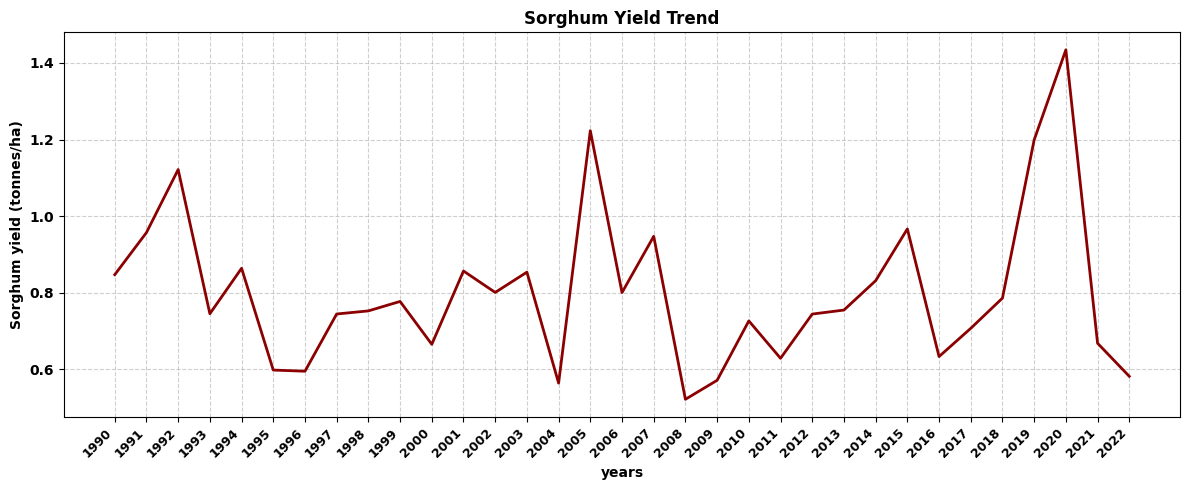

In [27]:
plt.figure(figsize=(12,5))
sns.lineplot(data=sorghum_yield, x='YEAR', y='Sorghum yield', color='darkred', markers='o', linewidth=2)

plt.title('Sorghum Yield Trend')
plt.xlabel('years')
plt.ylabel('Sorghum yield (tonnes/ha)')

all_sorghum=sorghum_yield['YEAR'].unique()
plt.xticks(ticks=all_sorghum,labels=all_sorghum, rotation=45, ha='right', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**SORGHUM YIELD IN COMPARISON WITH AVERAGE PESTICIDE USAGE**

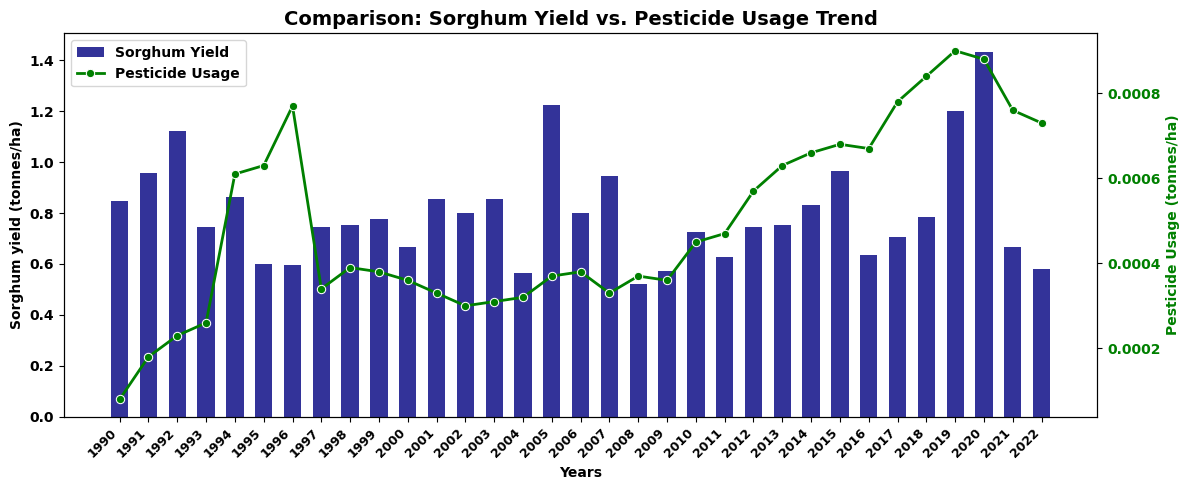

In [28]:
combined_sorghum=sorghum_yield.merge(pesticide_use_trend, on='YEAR', how='inner')
combined_sorghum.head()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Primary axis - Bar plot for Barley Yield with palette
ax1.set_xlabel('Years', fontweight='bold')
ax1.set_ylabel('Sorghum yield (tonnes/ha)', fontweight='bold')

# Creating a palette with as many colors as years
#palette = sns.color_palette("viridis", n_colors=len(combined_wheat))

bars = ax1.bar(combined_sorghum['YEAR'], combined_sorghum['Sorghum yield'], color='navy', alpha=0.8, label='Sorghum Yield', width=0.6)
ax1.tick_params(axis='y')
ax1.grid(False)

# Secondary axis - Line plot for Pesticide Usage
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel('Pesticide Usage (tonnes/ha)', color=color2, fontweight='bold')
line = sns.lineplot(data=combined_maize, x='YEAR', y='pesticide usage(tonne/ha)',
                    marker='o', ax=ax2, color=color2, label='Pesticide Usage', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)

plt.title('Comparison: Sorghum Yield vs. Pesticide Usage Trend', fontweight='bold', fontsize=14)

# Set x-axis ticks
all_years = combined_sorghum['YEAR'].unique()
ax1.set_xticks(all_years,)
ax1.set_xticklabels(all_years, rotation=45, ha='right', fontsize=9, fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

###**7. POTATOES YIELD TREND**

In [29]:
potato_yield=df.groupby('YEAR')['Potatoes yield'].mean().reset_index()
potato_yield.head()


,YEAR,Potatoes yield
0,1990,8.865500
1,1991,11.335600
2,1992,9.297501
3,1993,11.749001
4,1994,9.710800


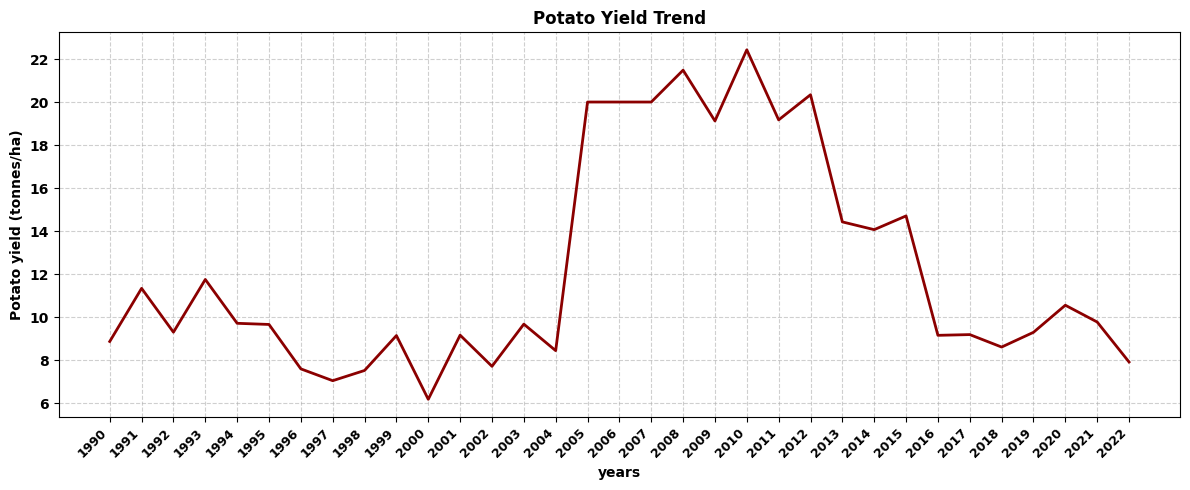

In [30]:
plt.figure(figsize=(12,5))
sns.lineplot(data=potato_yield,x='YEAR',y='Potatoes yield', color='darkred', markers='o', linewidth=2)

plt.title('Potato Yield Trend')
plt.xlabel('years')
plt.ylabel('Potato yield (tonnes/ha)')

all_potato=potato_yield['YEAR'].unique()
plt.xticks(ticks=all_potato,labels=all_potato, rotation=45, ha='right', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**POTATOES YIELD IN COMPARISON WITH AVERAGE PESTICIDE USAGE**

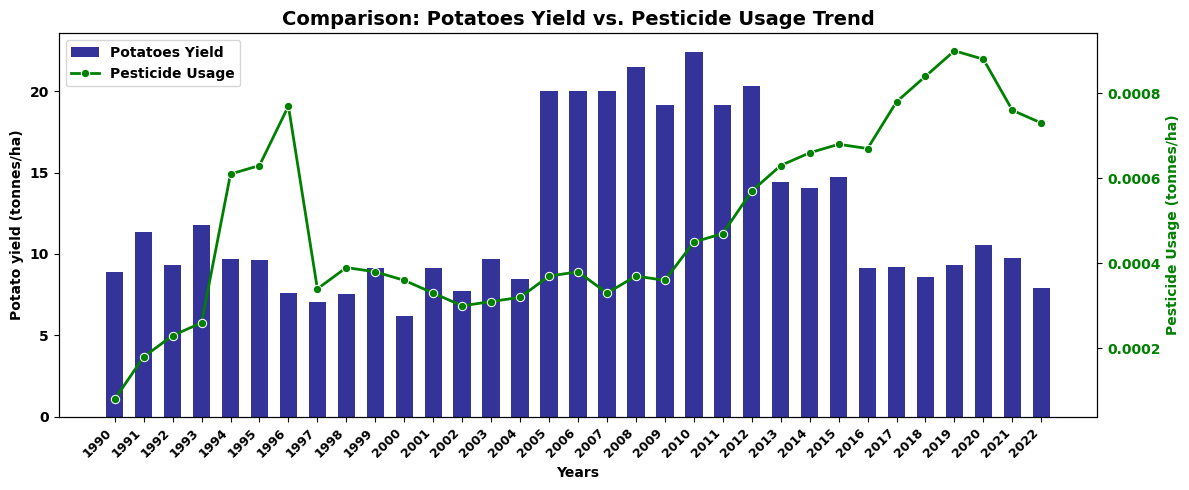

In [31]:
combined_potato=potato_yield.merge(pesticide_use_trend, on='YEAR', how='inner')
combined_potato.head()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Primary axis - Bar plot for Barley Yield with palette
ax1.set_xlabel('Years', fontweight='bold')
ax1.set_ylabel('Potato yield (tonnes/ha)', fontweight='bold')

# Creating a palette with as many colors as years
#palette = sns.color_palette("viridis", n_colors=len(combined_wheat))

bars = ax1.bar(combined_potato['YEAR'], combined_potato['Potatoes yield'], color='navy', alpha=0.8, label='Potatoes Yield', width=0.6)
ax1.tick_params(axis='y')
ax1.grid(False)

# Secondary axis - Line plot for Pesticide Usage
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel('Pesticide Usage (tonnes/ha)', color=color2, fontweight='bold')
line = sns.lineplot(data=combined_potato, x='YEAR', y='pesticide usage(tonne/ha)',
                    marker='o', ax=ax2, color=color2, label='Pesticide Usage', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)

plt.title('Comparison: Potatoes Yield vs. Pesticide Usage Trend', fontweight='bold', fontsize=14)

# Set x-axis ticks
all_years = combined_potato['YEAR'].unique()
ax1.set_xticks(all_years,)
ax1.set_xticklabels(all_years, rotation=45, ha='right', fontsize=9, fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()



---



##**Forecasting Crop Yields with Prophet (Time-Series Perspective)**

**Justification for the choice of prophet library**

Prophet is designed for long-term trend forecasting. It is excellent when:

The data is yearly

The project want future projections up to 2030

The main driver is time, not just features

The project want interpretable trend components

In [33]:
# Importing prophet Library
from prophet import Prophet

**Data preparation for prophet**

propeht considers two columns:

ds: ➡ YEAR COLUMN

y: ➡ Target variable i.e Specific crop yield

##**1. wheat yield prediction up to 2030**

**preparing the data for prophet**

In [34]:
df_wheat = df[['YEAR', 'Wheat yield']].copy()

# Renaming columns to meet Prophet requirements
df_wheat.columns = ['ds', 'y']

# Fixing the date: Convert '1990' to '1990-12-31' to avoid January 1st defaults
df_wheat['ds'] = pd.to_datetime(df_wheat['ds'].astype(str) + '-12-31')

df_wheat.head()

,ds,y
0,1990-12-31,1.6551
1,1991-12-31,1.8484
2,1992-12-31,1.9359
3,1993-12-31,1.3795
4,1994-12-31,2.2164


In [35]:
# Initializing the model with higher flexibility
model_wheat = Prophet(
    changepoint_prior_scale=0.5,  # Higher value = follows data trends more closely
    seasonality_prior_scale=0.1,  # Lower value = prevents overfitting to annual noise
    n_changepoints=20,            # Sufficient points for 30 years of data
    yearly_seasonality=False      # Turn off since we only have 1 data point per year
)

# Fitting the model
model_wheat.fit(df_wheat)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future_wheat = model_wheat.make_future_dataframe(periods=10, freq='Y')

# Predicting
forecast_wheat = model_wheat.predict(future_wheat)

# Displaying the last few rows of the forecast
forecast_wheat[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
38,2028-12-31,2.753043,2.114297,3.379855
39,2029-12-31,2.778855,2.185554,3.383901
40,2030-12-31,2.804667,2.183833,3.410568
41,2031-12-31,2.830479,2.223808,3.474824
42,2032-12-31,2.856361,2.253638,3.499782


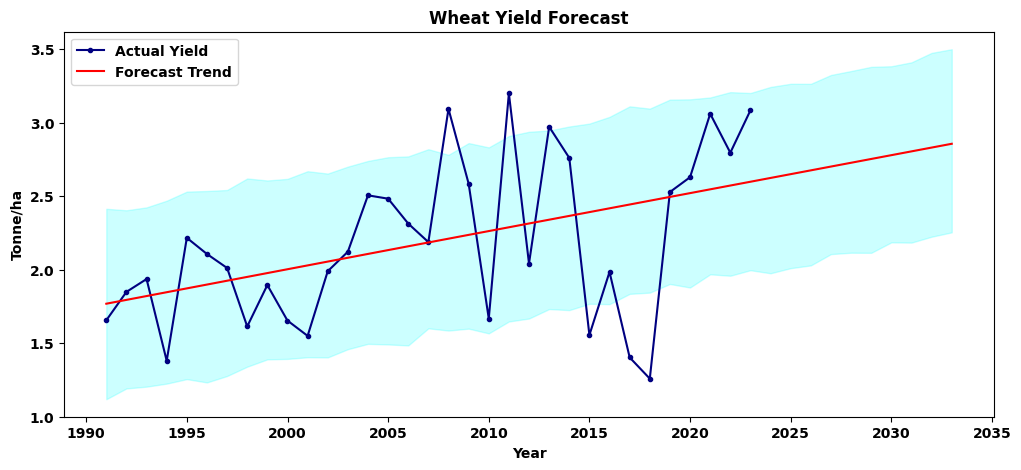

In [37]:
plt.figure(figsize=(12, 5))
plt.plot(df_wheat['ds'], df_wheat['y'], color='navy', label='Actual Yield', marker='o', markersize=3)

# Plotting the Forecast (yhat)
plt.plot(forecast_wheat['ds'], forecast_wheat['yhat'], color='red', label='Forecast Trend')

# Adding the Uncertainty Interval (the shaded area)
plt.fill_between(forecast_wheat['ds'], forecast_wheat['yhat_lower'], forecast_wheat['yhat_upper'],
                 color='cyan', alpha=0.2)

plt.title("Wheat Yield Forecast")
plt.xlabel("Year")
plt.ylabel("Tonne/ha")
plt.legend()
plt.show()

##**2. RICE YIELD PREDICTION UP TO 2030**

In [38]:
df_rice = df[['YEAR', 'Rice yield']].copy()


df_rice.columns = ['ds', 'y']

# Fixing the date: Convert '1990' to '1990-12-31' to avoid January 1st defaults
df_rice['ds'] = pd.to_datetime(df_rice['ds'].astype(str) + '-12-31')

df_rice.head()

,ds,y
0,1990-12-31,3.0984
1,1991-12-31,3.8846
2,1992-12-31,3.5362
3,1993-12-31,4.1483
4,1994-12-31,4.3559


In [39]:

model_rice = Prophet(
    changepoint_prior_scale=0.5,  # Higher value = follows data trends more closely
    seasonality_prior_scale=0.1,  # Lower value = prevents overfitting to annual noise
    n_changepoints=20,            # Sufficient points for 30 years of data
    yearly_seasonality=False      # Turn off since we only have 1 data point per year
)


model_rice.fit(df_rice)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future_rice = model_rice.make_future_dataframe(periods=10, freq='Y')


forecast_rice = model_rice.predict(future_rice)


forecast_rice[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
38,2028-12-31,6.288839,5.371202,7.271535
39,2029-12-31,6.450106,5.404944,7.463664
40,2030-12-31,6.611372,5.614986,7.685384
41,2031-12-31,6.772639,5.767506,7.741052
42,2032-12-31,6.934347,5.904304,7.940202


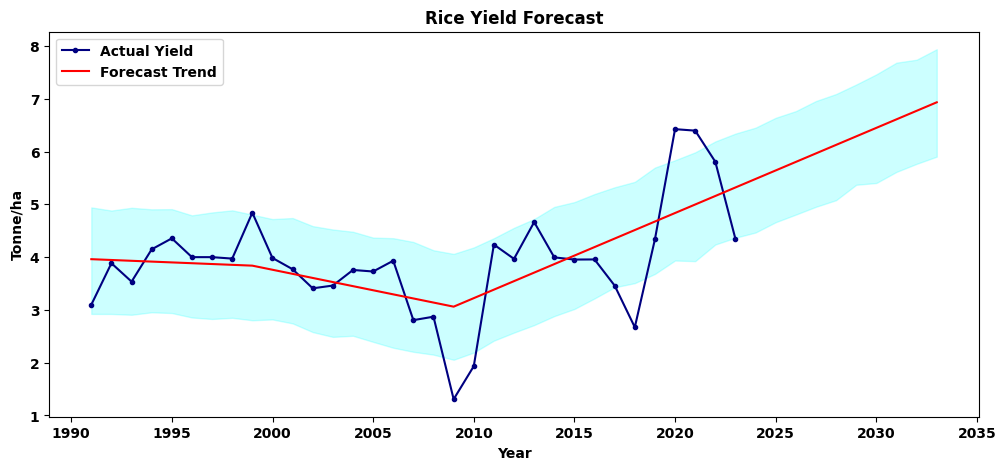

In [41]:
plt.figure(figsize=(12, 5))
plt.plot(df_rice['ds'], df_rice['y'], color='navy', label='Actual Yield', marker='o', markersize=3)


plt.plot(forecast_rice['ds'], forecast_rice['yhat'], color='red', label='Forecast Trend')


plt.fill_between(forecast_rice['ds'], forecast_rice['yhat_lower'], forecast_rice['yhat_upper'],
                 color='cyan', alpha=0.2)

plt.title("Rice Yield Forecast")
plt.xlabel("Year")
plt.ylabel("Tonne/ha")
plt.legend()
plt.show()

##**3. MAIZE YIELD PREDICTION UPTO 2030**

In [42]:
df_maize = df[['YEAR', 'Maize yield']].copy()


df_maize.columns = ['ds', 'y']

# Fix the date: Convert '1990' to '1990-12-31' to avoid January 1st defaults
df_maize['ds'] = pd.to_datetime(df_maize['ds'].astype(str) + '-12-31')

df_maize.head(2)

,ds,y
0,1990-12-31,1.6591
1,1991-12-31,1.8321


In [43]:

model_maize = Prophet(
    changepoint_prior_scale=0.5,  # Higher value = follows data trends more closely
    seasonality_prior_scale=0.1,  # Lower value = prevents overfitting to annual noise
    n_changepoints=20,            # Sufficient points for 30 years of data
    yearly_seasonality=False      # Turn off since we only have 1 data point per year
)


model_maize.fit(df_maize)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future_maize = model_maize.make_future_dataframe(periods=10, freq='Y')


forecast_maize = model_maize.predict(future_maize)


forecast_maize[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
40,2030-12-31,1.598553,1.386741,1.791828
41,2031-12-31,1.597467,1.385611,1.798934
42,2032-12-31,1.596378,1.385560,1.814911


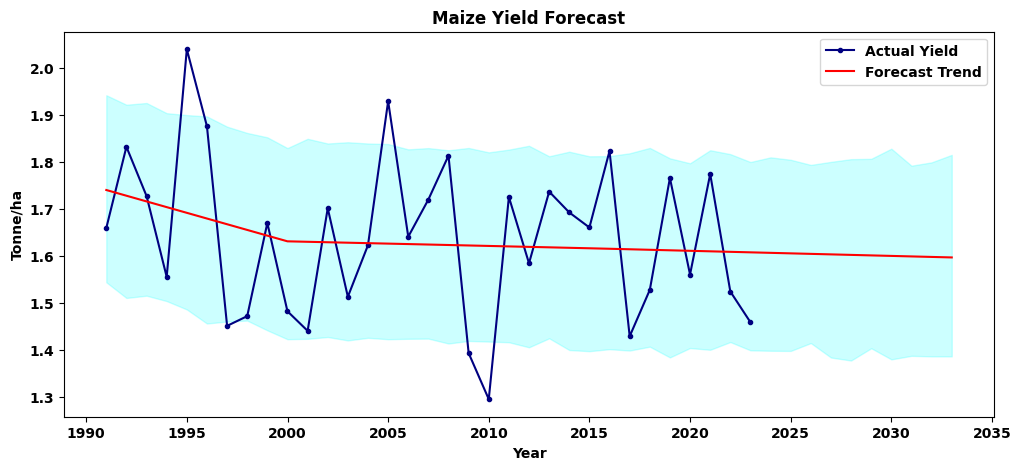

In [45]:
plt.figure(figsize=(12, 5))
plt.plot(df_maize['ds'], df_maize['y'], color='navy', label='Actual Yield', marker='o', markersize=3)


plt.plot(forecast_maize['ds'], forecast_maize['yhat'], color='red', label='Forecast Trend')


plt.fill_between(forecast_maize['ds'], forecast_maize['yhat_lower'], forecast_maize['yhat_upper'],
                 color='cyan', alpha=0.2)

plt.title("Maize Yield Forecast")
plt.xlabel("Year")
plt.ylabel("Tonne/ha")
plt.legend()
plt.show()

##**4.MILLET YIELD PREDICTION UPTO 2030**

In [46]:
df_millet = df[['YEAR', 'Millet yield']].copy()


df_millet.columns = ['ds', 'y']

# Fixing the date: Convert '1990' to '1990-12-31' to avoid January 1st defaults
df_millet['ds'] = pd.to_datetime(df_millet['ds'].astype(str) + '-12-31')

df_millet.head(2)

,ds,y
0,1990-12-31,0.6477
1,1991-12-31,0.5185


In [47]:
model_millet = Prophet(
    changepoint_prior_scale=0.5,  # Higher value = follows data trends more closely
    seasonality_prior_scale=0.1,  # Lower value = prevents overfitting to annual noise
    n_changepoints=20,            # Sufficient points for 30 years of data
    yearly_seasonality=False      # Turn off since we only have 1 data point per year
)


model_millet.fit(df_millet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future_millet = model_millet.make_future_dataframe(periods=10, freq='Y')


forecast_millet = model_millet.predict(future_millet)


forecast_millet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
40,2030-12-31,0.884464,0.629771,1.121671
41,2031-12-31,0.894303,0.634918,1.168350
42,2032-12-31,0.904168,0.633516,1.167069


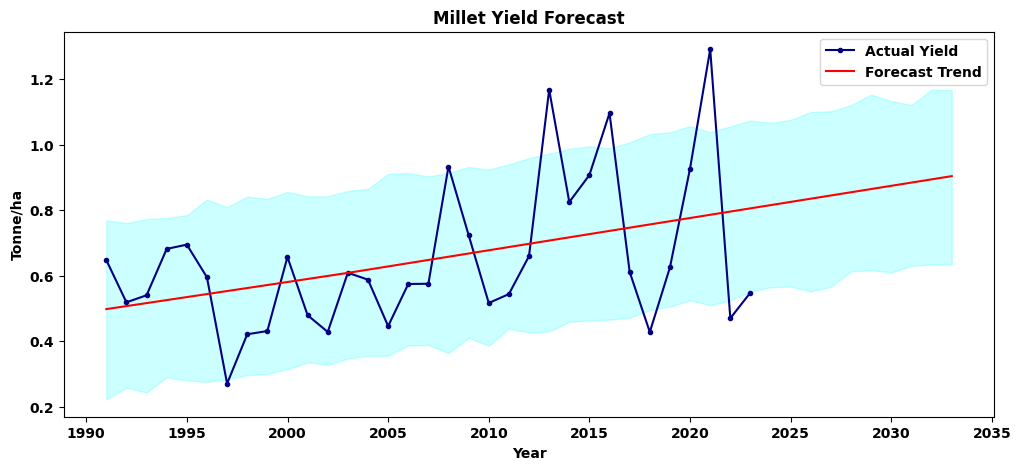

In [49]:
plt.figure(figsize=(12, 5))
plt.plot(df_millet['ds'], df_millet['y'], color='navy', label='Actual Yield', marker='o', markersize=3)


plt.plot(forecast_millet['ds'], forecast_millet['yhat'], color='red', label='Forecast Trend')


plt.fill_between(forecast_millet['ds'], forecast_millet['yhat_lower'], forecast_millet['yhat_upper'],
                 color='cyan', alpha=0.2)

plt.title("Millet Yield Forecast")
plt.xlabel("Year")
plt.ylabel("Tonne/ha")
plt.legend()
plt.show()

##**5. SORGHUM YIELD PREDICTION UPTO 2030**

In [50]:
df_sorghum = df[['YEAR', 'Sorghum yield']].copy()


df_sorghum.columns = ['ds', 'y']


df_sorghum['ds'] = pd.to_datetime(df_sorghum['ds'].astype(str) + '-12-31')

df_sorghum.head(2)

,ds,y
0,1990-12-31,0.8473
1,1991-12-31,0.9572


In [51]:
model_sorghum = Prophet(
    changepoint_prior_scale=0.5,  # Higher value = follows data trends more closely
    seasonality_prior_scale=0.1,  # Lower value = prevents overfitting to annual noise
    n_changepoints=20,            # Sufficient points for 30 years of data
    yearly_seasonality=False      # Turn off since we only have 1 data point per year
)


model_sorghum.fit(df_sorghum)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
future_sorghum = model_sorghum.make_future_dataframe(periods=10, freq='Y')


forecast_sorghum = model_sorghum.predict(future_sorghum)


forecast_sorghum[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
40,2030-12-31,0.934892,0.674030,1.182688
41,2031-12-31,0.943226,0.674650,1.180614
42,2032-12-31,0.951583,0.697758,1.207322


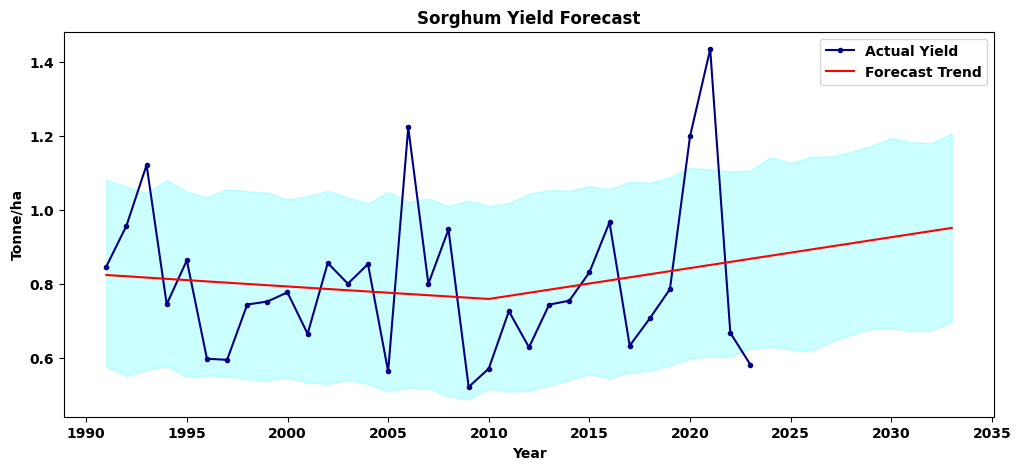

In [53]:
plt.figure(figsize=(12, 5))
plt.plot(df_sorghum['ds'], df_sorghum['y'], color='navy', label='Actual Yield', marker='o', markersize=3)

# Plotting the Forecast (yhat)
plt.plot(forecast_sorghum['ds'], forecast_sorghum['yhat'], color='red', label='Forecast Trend')

# Adding the Uncertainty Interval (the shaded area)
plt.fill_between(forecast_sorghum['ds'], forecast_sorghum['yhat_lower'], forecast_sorghum['yhat_upper'],
                 color='cyan', alpha=0.2)

plt.title("Sorghum Yield Forecast")
plt.xlabel("Year")
plt.ylabel("Tonne/ha")
plt.legend()
plt.show()

##**6. POTATOES YIELD PREDICTION UPTO 2030**

In [54]:
df.columns

Index(['YEAR', 'pesticide usage(kg/ha)', 'pesticide usage(tonne/ha)',
       'Wheat yield', 'Rice yield', 'Barley yield', 'Maize yield',
       'Oats yield', 'Millet yield', 'Sorghum yield', 'Potatoes yield'],
      dtype='object')

In [55]:
df_potato = df[['YEAR', 'Potatoes yield']].copy()

# Renaming columns to meet Prophet requirements
df_potato.columns = ['ds', 'y']

# Fixing the date: Convert '1990' to '1990-12-31' to avoid January 1st defaults
df_potato['ds'] = pd.to_datetime(df_potato['ds'].astype(str) + '-12-31')

df_potato.head(2)

,ds,y
0,1990-12-31,8.8655
1,1991-12-31,11.3356


In [56]:
model_potato = Prophet(
    changepoint_prior_scale=0.5,  # Higher value = follows data trends more closely
    seasonality_prior_scale=0.1,  # Lower value = prevents overfitting to annual noise
    n_changepoints=20,            # Sufficient points for 30 years of data
    yearly_seasonality=False      # Turn off since we only have 1 data point per year
)


model_potato.fit(df_potato)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future_potato = model_potato.make_future_dataframe(periods=10, freq='Y')

# Predicting
forecast_potato = model_potato.predict(future_potato)

# Displaying the last few rows of the forecast
forecast_potato[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
40,2030-12-31,-1.807059,-6.231310,2.882125
41,2031-12-31,-2.870230,-8.013497,2.362335
42,2032-12-31,-3.936313,-9.713712,2.147661


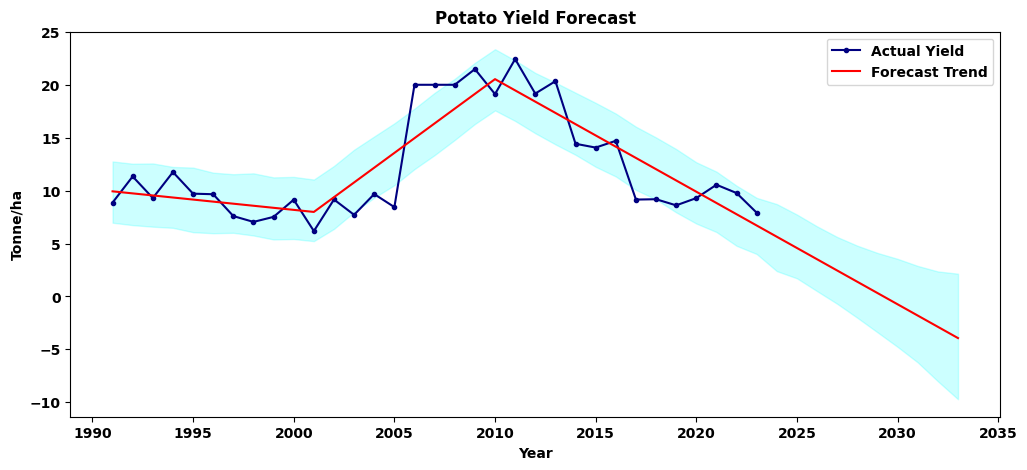

In [58]:
plt.figure(figsize=(12, 5))
plt.plot(df_potato['ds'], df_potato['y'], color='navy', label='Actual Yield', marker='o', markersize=3)


plt.plot(forecast_potato['ds'], forecast_potato['yhat'], color='red', label='Forecast Trend')


plt.fill_between(forecast_potato['ds'], forecast_potato['yhat_lower'], forecast_potato['yhat_upper'],
                 color='cyan', alpha=0.2)




plt.title("Potato Yield Forecast")
plt.xlabel("Year")
plt.ylabel("Tonne/ha")
plt.legend()
plt.show()

##**7. BARLEY YIELD PREDICTION UPTO 2030**

In [59]:
df_barley = df[['YEAR', 'Barley yield']].copy()


df_barley.columns = ['ds', 'y']


df_barley['ds'] = pd.to_datetime(df_barley['ds'].astype(str) + '-12-31')

df_barley.head(2)

,ds,y
0,1990-12-31,1.8155
1,1991-12-31,1.8900


In [60]:
model_barley = Prophet(
    changepoint_prior_scale=0.5,  # Higher value = follows data trends more closely
    seasonality_prior_scale=0.1,  # Lower value = prevents overfitting to annual noise
    n_changepoints=20,            # Sufficient points for 30 years of data
    yearly_seasonality=False      # Turn off since we only have 1 data point per year
)


model_barley.fit(df_barley)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
future_barley = model_barley.make_future_dataframe(periods=10, freq='Y')


forecast_barley = model_barley.predict(future_barley)


forecast_barley[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
40,2030-12-31,2.816454,2.153106,3.406792
41,2031-12-31,2.765570,2.180832,3.385646
42,2032-12-31,2.714546,2.097453,3.359084


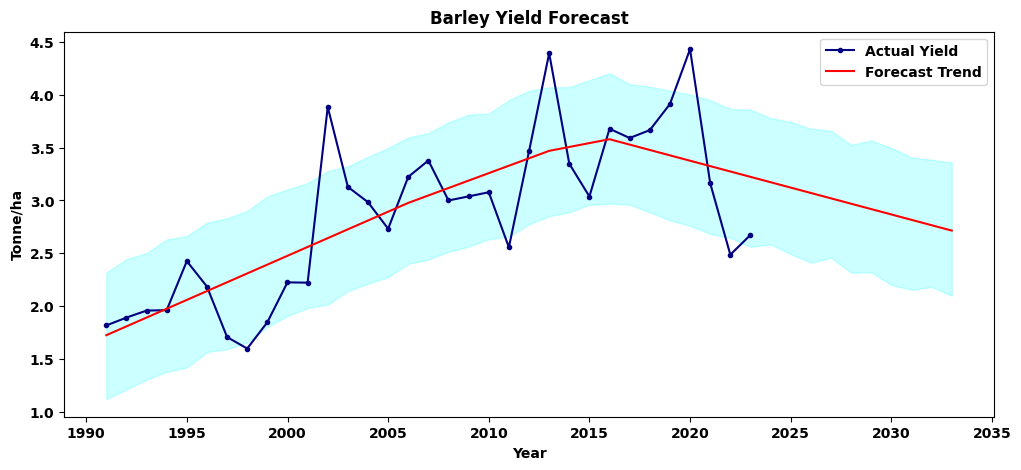

In [62]:
plt.figure(figsize=(12, 5))
plt.plot(df_barley['ds'], df_barley['y'], color='navy', label='Actual Yield', marker='o', markersize=3)

plt.plot(forecast_barley['ds'], forecast_barley['yhat'], color='red', label='Forecast Trend')


plt.fill_between(forecast_barley['ds'], forecast_barley['yhat_lower'], forecast_barley['yhat_upper'],
                 color='cyan', alpha=0.2)




plt.title("Barley Yield Forecast")
plt.xlabel("Year")
plt.ylabel("Tonne/ha")
plt.legend()
plt.show()



---



##**Machine Learning Section: Modeling the Pesticide–Yield Relationship**

###**The section introduces supervised machine learning to explicitly model how pesticide usage influences crop yields.**

**Selected Model: Gradient Boosting Regressor**

*Why Gradient Boosting?*

Gradient Boosting is well-suited for this problem because:

-It captures non-linear relationships between pesticide use and yield

-It works well on small-to-medium datasets

-It handles interaction effects (e.g., pesticide + time)

-It provides feature importance, improving interpretability

-It is more robust than linear regression for real-world agricultural data

###**Machine Learning Objective**

Goal: To predict crop yield using:

1. Pesticide usage (tonnes/ha)

2. Time (year-based trends)

3. Lagged historical effects

**This allows us to:**

1. Quantify pesticide–yield dependency

2. Validate Prophet forecasts

3. Detect diminishing or plateau effects

**Feature Engineering Strategy**

Before training the model, we engineer features that reflect real agricultural behavior.

**Features Used**

1. year → captures long-term trends

2. pesticide_tonnes_per_ha → main explanatory variable

3. pesticide_lag_1 → previous year’s pesticide effect

4. yield_lag_1 → yield persistence over time

5. Lag features are critical because crop response is rarely instantaneous

**Why Time Series Cross-Validation?**

Random train-test splits cause data leakage in time series.

Instead, we use TimeSeriesSplit, which:

1. Trains on past data

2. Tests on future data

3. Mimics real-world forecasting conditions

*This ensures the model is honest and realistic.*

**machine learning implementation**

In [64]:
df.columns

Index(['YEAR', 'pesticide usage(kg/ha)', 'pesticide usage(tonne/ha)',
       'Wheat yield', 'Rice yield', 'Barley yield', 'Maize yield',
       'Oats yield', 'Millet yield', 'Sorghum yield', 'Potatoes yield'],
      dtype='object')

### Step 1: Data Preparation

Machine learning models require structured input features.
Since agricultural yield responds to pesticide usage with delay,
we create **lag features** to capture past effects.

Lag features allow the model to understand:
- How last year's pesticide usage affects this year's yield
- Temporal dependencies in agricultural production


In [65]:
# Copying dataset to avoid modifying original
df_ml = df.copy()

# Ensuring year is sorted
df_ml = df_ml.sort_values("YEAR")

# Cropping yield columns
crop_columns = [
    "Wheat yield",
    "Rice yield",
    "Barley yield",
    "Maize yield",
    "Sorghum yield",
    "Millet yield",

]

# Creating lag features
df_ml["pesticide_lag_1"] = df_ml["pesticide usage(tonne/ha)"].shift(1)

for crop in crop_columns:
    df_ml[f"{crop}_lag_1"] = df_ml[crop].shift(1)

# Dropping rows with missing lag values
df_ml = df_ml.dropna()

df_ml.head()


,YEAR,pesticide usage(kg/ha),pesticide usage(tonne/ha),Wheat yield,Rice yield,Barley yield,Maize yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield,pesticide_lag_1,Wheat yield_lag_1,Rice yield_lag_1,Barley yield_lag_1,Maize yield_lag_1,Sorghum yield_lag_1,Millet yield_lag_1
1,1991,0.18,0.00018,1.8484,3.8846,1.8900,1.8321,1.1085,0.5185,0.9572,11.335600,0.00008,1.6551,3.0984,1.8155,1.6591,0.8473,0.6477
2,1992,0.23,0.00023,1.9359,3.5362,1.9565,1.7271,1.1111,0.5400,1.1216,9.297501,0.00018,1.8484,3.8846,1.8900,1.8321,0.9572,0.5185
3,1993,0.26,0.00026,1.3795,4.1483,1.9605,1.5549,1.0882,0.6817,0.7454,11.749001,0.00023,1.9359,3.5362,1.9565,1.7271,1.1216,0.5400
4,1994,0.61,0.00061,2.2164,4.3559,2.4249,2.0400,1.0857,0.6948,0.8640,9.710800,0.00026,1.3795,4.1483,1.9605,1.5549,0.7454,0.6817
5,1995,0.63,0.00063,2.1064,4.0000,2.1843,1.8759,1.0588,0.5951,0.5984,9.657500,0.00061,2.2164,4.3559,2.4249,2.0400,0.8640,0.6948


**Defining Features and Target Variables**

### Step 2: Feature Selection

The model uses:
- Current pesticide usage
- Previous year pesticide usage
- Previous year crop yield

This allows the model to learn both:
- Immediate impact
- Delayed impact


In [66]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Input features
X = df_ml[
    ["pesticide usage(tonne/ha)", "pesticide_lag_1"]
]

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

results = {}
models = {}


###**Step 3: Training Gradient Boosting Models (Per Crop)**

###  Model Training Using Time-Series Cross-Validation

Each crop yield is modeled independently using Gradient Boosting.

TimeSeriesSplit is used instead of random splitting to:
- Preserve chronological order
- Prevent data leakage
- Mimic real-world forecasting conditions


In [67]:
for crop in crop_columns:
    y = df_ml[crop]

    fold_metrics = []

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = GradientBoostingRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=3,
            random_state=42
        )

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        fold_metrics.append({
            "MAE": mean_absolute_error(y_test, preds),
            "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
            "R2": r2_score(y_test, preds)
        })

    results[crop] = pd.DataFrame(fold_metrics).mean()
    models[crop] = model


###**Step 4: Model Performance Evaluation**



Model performance is evaluated using:
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R² Score (Explained Variance)

Higher R² and lower error values indicate stronger predictive performance.


In [68]:
performance_df = pd.DataFrame(results).T
performance_df


,MAE,RMSE,R2
Wheat yield,0.721335,0.797483,-9.676747
Rice yield,0.974587,1.136655,-1.544703
Barley yield,0.948609,1.125672,-11.566062
Maize yield,0.176840,0.202921,-1.811385
Sorghum yield,0.175706,0.236506,-2.055877
Millet yield,0.264172,0.327434,-1.784591


### **Step 5: Feature Importance Analysis**

Feature importance shows how much each variable contributes
to the prediction of crop yields.

This helps answer:
- Is pesticide usage actually influencing yield?
- Is last year's pesticide usage more important than current usage?

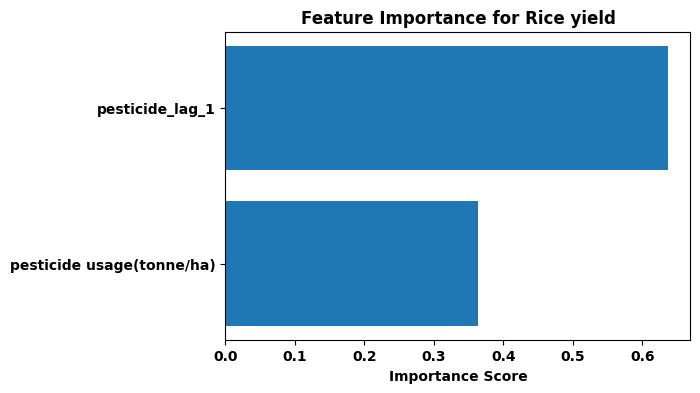

In [69]:

crop_example = "Rice yield"
model = models[crop_example]

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
plt.barh(features, importance)
plt.title(f"Feature Importance for {crop_example}")
plt.xlabel("Importance Score")
plt.show()


### **Justification for the ML Section**

This ML section strengthens the project by:

- Going beyond trend forecasting (Prophet)
- Explicitly modeling the pesticide–yield relationship
- Using lag features to capture delayed agricultural effects
- Applying time-aware validation
- Providing interpretable insights through feature importance

Together, Prophet and Gradient Boosting offer:
- Temporal forecasting (Prophet)
- Causal pattern learning (Machine Learning)




##**Conclusion and Policy Implications**

The findings from this analysis carry important implications for agricultural policy and planning.

First, increasing pesticide use alone does not guarantee sustained yield growth. In several cases, yield improvements appear to plateau despite rising input intensity, suggesting diminishing marginal returns.

Second, predictive modeling indicates that future yield growth may slow under current trajectories. This underscores the need for diversified productivity strategies, including soil health management, climate-resilient crops, and precision agriculture.